<a href="https://colab.research.google.com/github/HSE-LAMBDA/MLatFIAN2020/blob/master/seminar03/MLatFIAN2020_seminar03_homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Boston housing dataset

Use the data and model from the seminar:

In [5]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np

from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [6]:
columns = ["CRIM", "RM", "LSTAT"]

data = load_boston()
X = pd.DataFrame(data.data, columns=data.feature_names)[columns]
X /= X.max()
y = data.target

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=50, random_state=42)

model = make_pipeline(
    PolynomialFeatures(9, include_bias=False),
    Ridge(alpha=0.1)
)

model.fit(X_train, y_train)

print('train mse = ', mean_squared_error(y_train, model.predict(X_train)))
print('test mse = ', mean_squared_error(y_test, model.predict(X_test)))

train mse =  19.31202807811291
test mse =  8.51750188176286


# Task 1

Use `sklearn.model_selection.cross_validate` to perform K-fold cross-validation of the model above. Plot histograms of train and test scores (`"neg_mean_squared_error"`) on the same plot.

Do that for 10 and 100 folds.


See the docs for more details about the function: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html

In [69]:
from sklearn.model_selection import cross_validate

In [70]:
#10 folds

scores = cross_validate(model, X, y, cv=10,
                        scoring=('neg_mean_squared_error'), return_train_score=True)

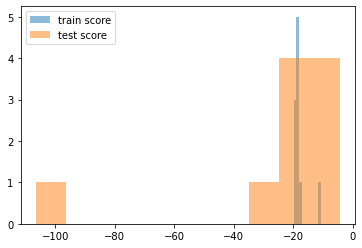

In [71]:
plt.hist(scores['train_score'], alpha=0.5, label='train score')
plt.hist(scores['test_score'], alpha=0.5, label='test score')
plt.legend(loc='upper left')
plt.show()

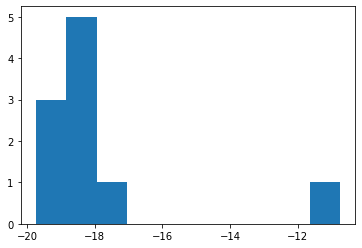

(array([1., 0., 0., 0., 0., 0., 0., 1., 4., 4.]),
 array([-106.53803875,  -96.30010308,  -86.06216741,  -75.82423175,
         -65.58629608,  -55.34836041,  -45.11042474,  -34.87248908,
         -24.63455341,  -14.39661774,   -4.15868207]),
 <a list of 10 Patch objects>)

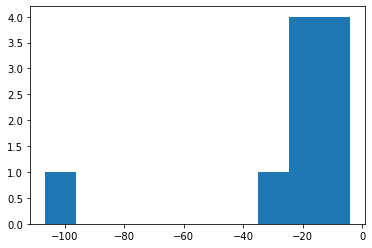

In [72]:
plt.hist(scores['train_score'], label='train score')
plt.show()

plt.hist(scores['test_score'], label='test score')

In [62]:
#100 folds

scores = cross_validate(model, X, y, cv=100, scoring=('neg_mean_squared_error'), return_train_score=True)

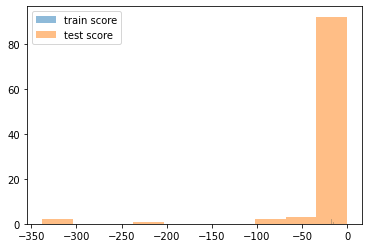

In [67]:
plt.hist(scores['train_score'], alpha=0.5, label='train score')
plt.hist(scores['test_score'], alpha=0.5, label='test score')
plt.legend(loc='upper left')
plt.show()

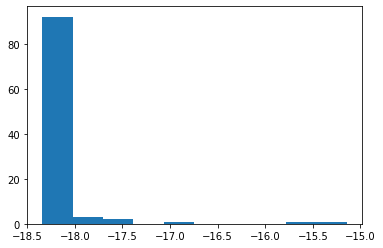

(array([ 2.,  0.,  0.,  1.,  0.,  0.,  0.,  2.,  3., 92.]),
 array([-337.84877489, -304.15951849, -270.4702621 , -236.7810057 ,
        -203.0917493 , -169.4024929 , -135.7132365 , -102.02398011,
         -68.33472371,  -34.64546731,   -0.95621091]),
 <a list of 10 Patch objects>)

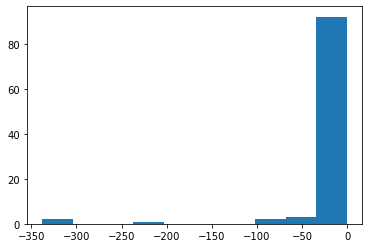

In [68]:
plt.hist(scores['train_score'], label='train score')
plt.show()

plt.hist(scores['test_score'], label='test score')

Честно говоря не знаю как интрепретировать полученные графики: либо я что-то не понял и ошибся, либо все так и должно быть :/